In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from matplotlib import pyplot as plt 
  


df = pd.read_excel("C:/Users/ehtes/Desktop/Harrisburg Uni/4. Semester/1. Machine Learning 1/Project/bankfull.xlsx")

In [2]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

As we can see the dataset contains 17 features so from these we can explore some questions to better understand the data
1. Which education background defaulted on loan 
2. Impact of marital status on defaults
3. Impact of age group on defaults
4. Impact of job status on default
5. Distribution of people with house loans and job status with age group. 
6. Marketing towards single people will have a high chance of success
7. It is useless to contact the people again if they have been contacted previously
8. Having a loan prior means people wont be taking new loans
9. Will educated people tend to own a house
10. Does Age impact wealth or house status and do older people tend to be divorced more. 
11. Impact of duration on Target 
12. Do people tend to accept more if contacted on landline vs cellular


In [4]:
df.info()  ### it gives us the summary about the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.isnull().sum() ### gives the sum of missing values with respect to columns

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [6]:
df2 = df

In [7]:
df2['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [8]:
from numpy import array
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder = LabelEncoder()
df2.job = label_encoder.fit_transform(df2.job)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
df2['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [11]:
label_encoder = LabelEncoder()
df2.marital = label_encoder.fit_transform(df2.marital)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,2,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,1,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,1,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,2,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
df2['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [13]:
label_encoder = LabelEncoder()
df2.education = label_encoder.fit_transform(df2.education)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,2,1,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,1,1,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,1,3,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,2,3,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
df2['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [15]:
label_encoder = LabelEncoder()
df2.default = label_encoder.fit_transform(df2.default)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,2,1,0,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,1,1,0,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,1,3,0,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,2,3,0,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
df2['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [17]:
label_encoder = LabelEncoder()
df2.housing = label_encoder.fit_transform(df2.housing)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,2,1,0,29,1,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,1,1,0,2,1,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,1,3,0,1506,1,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,2,3,0,1,0,no,unknown,5,may,198,1,-1,0,unknown,no


In [18]:
df2['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [19]:
label_encoder = LabelEncoder()
df2.loan = label_encoder.fit_transform(df2.loan)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,2,1,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,1,1,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,1,3,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,2,3,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no


In [20]:
df2['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [21]:
label_encoder = LabelEncoder()
df2.contact = label_encoder.fit_transform(df2.contact)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,unknown,no
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,unknown,no
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,unknown,no
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,unknown,no
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,unknown,no


In [22]:
df2['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [23]:
label_encoder = LabelEncoder()
df2.month = label_encoder.fit_transform(df2.month)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,unknown,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,unknown,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,unknown,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,unknown,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,unknown,no


In [24]:
df2['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [25]:
label_encoder = LabelEncoder()
df2.poutcome = label_encoder.fit_transform(df2.poutcome)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no


In [26]:
df2['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [27]:
label_encoder = LabelEncoder()
df2.Target = label_encoder.fit_transform(df2.Target)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


# Feature Selection - Using Person's Correlation to select the independent varibales

In [28]:
cor_matrix=df2.corr()

In [29]:
print(cor_matrix['Target'].sort_values(ascending=False))

Target       1.000000
duration     0.394521
pdays        0.103621
previous     0.093236
education    0.066241
balance      0.052838
marital      0.045588
job          0.040438
age          0.025155
default     -0.022419
month       -0.024471
day         -0.028348
loan        -0.068185
campaign    -0.073172
poutcome    -0.077840
housing     -0.139173
contact     -0.148395
Name: Target, dtype: float64


In [30]:
cor_matrix

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


In [31]:
df['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

In [32]:
df['balance'].unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353], dtype=int64)

In [33]:
sum(df.duplicated())

0

In [34]:
df['age']  = np.where((df['age'] <20) ,'Teenager',
                                np.where((df['age'] >=20) & (df['age'] <=30),'Adult',
                               np.where((df['age']>30) & (df['age'] <=50),'Middle Aged',
np.where((df['age']>50) & (df['age'] <=65),'Old',np.where((df['age']>50) & (df['age'] <=65),'Senior','Super Senior')))))

In [35]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,Old,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,Middle Aged,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,Middle Aged,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,Middle Aged,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,Middle Aged,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,Old,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,Super Senior,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,Super Senior,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,Old,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [36]:
df['balance'].value_counts()

0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64

In [37]:
df['balance'].mean()

1362.2720576850766

In [38]:
df['balance'].max()

102127

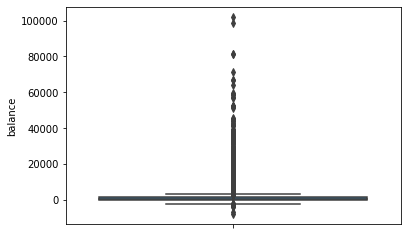

In [39]:
sns.boxplot( y = 'balance', data = df)

In [40]:
(df['balance']<0).sum()

3766

In [41]:
((df['balance']>0) & (df['balance']<1200)).sum()

24968

In [42]:
((df['balance']>1200) & (df['balance']<1500)).sum()

2057

In [43]:
((df['balance']>1500) & (df['balance']<30000)).sum()

10843

In [44]:
((df['balance']>30000).sum())

52

In [45]:
df['balance']  = np.where((df['balance'] <0) ,'Negative',
                               np.where((df['balance'] >=0) & (df['balance'] <=1200),'Low',
                               np.where((df['balance']>1200) & (df['balance'] <=1500),'Average',
                               np.where((df['balance']>1500) & (df['balance'] <=30000),'High',
                                       'very high'))))

In [46]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,Old,4,1,2,0,High,1,0,2,5,8,261,1,-1,0,3,0
1,Middle Aged,9,2,1,0,Low,1,0,2,5,8,151,1,-1,0,3,0
2,Middle Aged,2,1,1,0,Low,1,1,2,5,8,76,1,-1,0,3,0
3,Middle Aged,1,1,3,0,High,1,0,2,5,8,92,1,-1,0,3,0
4,Middle Aged,11,2,3,0,Low,0,0,2,5,8,198,1,-1,0,3,0


In [47]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [48]:
df['day'].mean()

15.80641879188693

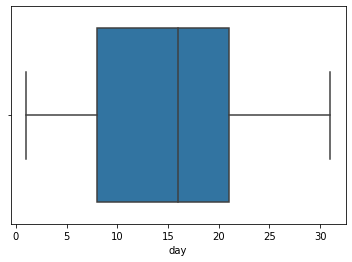

In [49]:
sns.boxplot(x='day',data=df)

In [50]:
df['day'].max()

31

In [51]:
df['day']  = np.where((df['day'] <5) ,'Below5',
                               np.where((df['day'] >=5) & (df['day'] <=10),'Between5-10',
                               np.where((df['day']>10) & (df['day'] <=20),'Between 10&20',
                               'Above 20')))

In [52]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,Old,4,1,2,0,High,1,0,2,Between5-10,8,261,1,-1,0,3,0
1,Middle Aged,9,2,1,0,Low,1,0,2,Between5-10,8,151,1,-1,0,3,0
2,Middle Aged,2,1,1,0,Low,1,1,2,Between5-10,8,76,1,-1,0,3,0
3,Middle Aged,1,1,3,0,High,1,0,2,Between5-10,8,92,1,-1,0,3,0
4,Middle Aged,11,2,3,0,Low,0,0,2,Between5-10,8,198,1,-1,0,3,0


In [53]:
df['day'].value_counts()

Between 10&20    18389
Above 20         13097
Between5-10       9586
Below5            4139
Name: day, dtype: int64

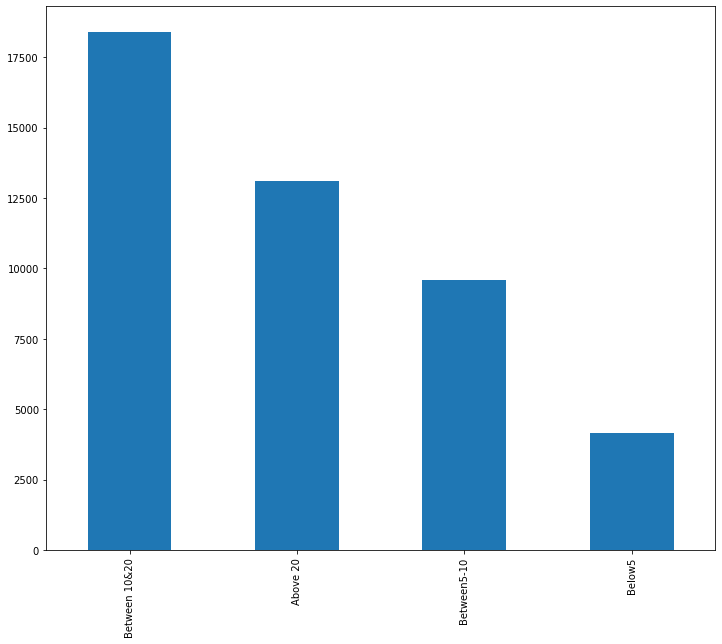

In [54]:
df['day'].value_counts().plot(kind='bar', figsize=(12,10))

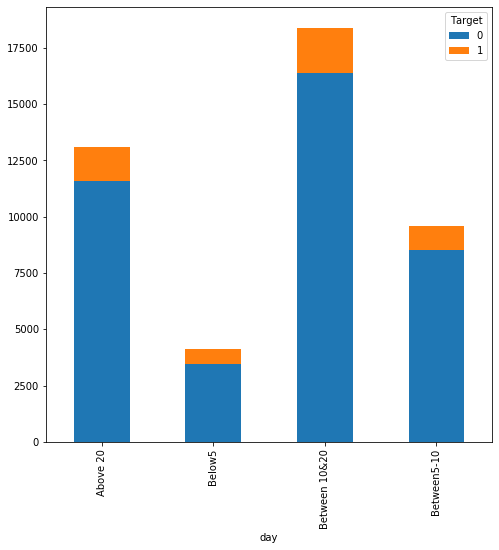

In [55]:
tab=pd.crosstab(df['day'],df['Target'])
tab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [56]:
df['duration'].value_counts().unique()

array([188, 184, 177, 175, 174, 173, 170, 169, 168, 166, 165, 164, 163,
       162, 161, 160, 159, 157, 156, 155, 154, 153, 152, 151, 150, 149,
       148, 147, 146, 145, 144, 142, 141, 140, 139, 138, 137, 136, 135,
       134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122,
       121, 120, 119, 118, 117, 116, 115, 113, 112, 111, 110, 108, 107,
       106, 105, 104, 103, 101, 100,  99,  97,  96,  95,  94,  93,  92,
        91,  90,  89,  88,  87,  86,  85,  84,  83,  82,  81,  80,  79,
        78,  77,  76,  75,  73,  72,  71,  70,  68,  67,  66,  65,  64,
        63,  62,  61,  60,  58,  57,  56,  55,  54,  53,  52,  50,  49,
        48,  47,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,  35,
        34,  33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,  22,
        21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  10,   9,
         8,   7,   6,   5,   4,   3,   2,   1], dtype=int64)

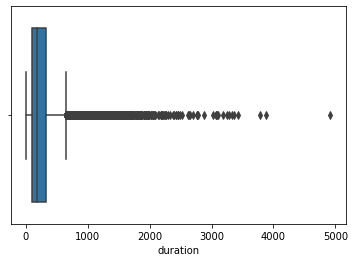

In [57]:
sns.boxplot(x='duration',data=df)

In [58]:
df['marital'].value_counts()

1    27214
2    12790
0     5207
Name: marital, dtype: int64

In [59]:
df['marital2'] = df['marital'].replace(['married','single','divorced'],[0,1,2])

TypeError: Cannot compare types 'ndarray(dtype=int32)' and 'str'

In [ ]:
df.head()

In [ ]:
df['balance'].value_counts()

In [ ]:
df['balance2'] = df['balance'].replace(['Negative','Low','Average','High','very high'],[0,1,2,3,4])

In [ ]:
df.head()

In [ ]:
df['month'].value_counts()

In [ ]:
from numpy import array
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
df.month = label_encoder.fit_transform(df.month)
df.head()

In [ ]:
df['month'].value_counts()